# Analysis

In this notebook we will analyse the models that we created.

The analysis consists of:

1) comparing the perplexity and the accuracy between the rationalized and non-rationalized model 

2) Checking the change in perplexity when removing even more from the rational

3) Checking the distribution of rationals

4) Qualitative analysis of the some examples

## Setup

In [1]:
#First we fix the relative imports
import os
import sys
# M
# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
    
#Make sure we are in the top folder. 
os.chdir(os.path.join('..'))

In [2]:
### We load the models based on the configs for analysis. 
from utils.analysis import parse_config_for_analysis
config_path = 'configs/simple_RE_config.yml'

loaded_info = parse_config_for_analysis(config_path)


C:\Users\gerso\projects\rational-dialog-model\utils\analysis.py:24: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


./daily_dialog/tokenizer.json
200


Using custom data configuration default
Reusing dataset daily_dialog (C:\Users\gerso\.cache\huggingface\datasets\daily_dialog\default\1.0.0\c03444008e9508b8b76f1f6793742d37d5e5f83364f8d573c2747bff435ea55c)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores


load pretrained_model:  ./models/small_lm.pt
load pretrained_model:  ./models/small_lm_token_rationalized.pt
2


## Perplexity and Accuracy

In [3]:
lm_RE = loaded_info["lightning_language_model_RE"].to("cuda")
lm = loaded_info["lightning_language_model_no_RE"].to("cuda")
tokenizer = loaded_info["tokenizer"]
dataloader_test = loaded_info["dataloader_test"]



In [4]:
### First thing we compare the perplexity and accuracy on the testset.
from utils.analysis import get_results, get_results_RE


lm_RE_result = get_results_RE(lm_RE, dataloader_test, 1)
lm_result = get_results(lm, dataloader_test)
print(lm_RE_result)
print(lm_result)


  0%|                                                                                          | 0/735 [00:00<?, ?it/s]C:\Users\gerso\anaconda3\envs\CDM\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
100%|███████████████████████████████████████████████████████████████████████████████| 735/735 [00:02<00:00, 312.99it/s]

{'mean_acc': {'mean': 0.36618857776493857, 'std': 0.0}, 'mean_perplexity': {'mean': 30.240165977270287, 'std': 0.0}, 'mean_mask_percentage': {'mean': 0.23160764725132002, 'std': 0.0}}
{'mean_acc': 0.3865536399200871, 'mean_perplexity': 25.97224727303416, 'mean_mask_percentage': 0}


## Change in perplexity

In [5]:
### Next we test what happens if we check te change in perplexity of the RE. 
# from utils.analysis import calc_change_in_perplexity_experiment
# change_in_perplexity = calc_change_in_perplexity_experiment(lm_RE, dataloader_test, n_experiments=10, n_extra_mask=2)
# change_in_perplexity

RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 8.00 GiB total capacity; 6.43 GiB already allocated; 5.88 MiB free; 6.48 GiB reserved in total by PyTorch)

## Distribution of mask

In [6]:
from utils.analysis import rational_analysis

rational_distributions = rational_analysis(lm_RE, dataloader_test)
print(rational_distributions)

{'abs_average': tensor(34.0406, device='cuda:0'), 'rel_average': tensor(0.5105, device='cuda:0'), 'abs_pos_count': Counter({0.0: 123386, 1.0: 5128, 2.0: 4682, 9.0: 3942, 7.0: 3907, 6.0: 3901, 4.0: 3867, 10.0: 3864, 8.0: 3845, 11.0: 3828, 5.0: 3821, 12.0: 3789, 3.0: 3769, 13.0: 3730, 14.0: 3710, 15.0: 3629, 17.0: 3571, 16.0: 3542, 18.0: 3521, 19.0: 3485, 20.0: 3411, 21.0: 3385, 22.0: 3374, 23.0: 3278, 24.0: 3261, 25.0: 3193, 27.0: 3159, 26.0: 3154, 28.0: 3085, 29.0: 3042, 30.0: 2973, 31.0: 2949, 32.0: 2932, 33.0: 2889, 34.0: 2842, 37.0: 2792, 35.0: 2781, 36.0: 2760, 39.0: 2680, 38.0: 2645, 42.0: 2583, 40.0: 2582, 41.0: 2576, 43.0: 2499, 44.0: 2474, 46.0: 2433, 45.0: 2428, 47.0: 2356, 48.0: 2345, 49.0: 2323, 50.0: 2274, 51.0: 2195, 52.0: 2174, 53.0: 2158, 54.0: 2109, 55.0: 2100, 56.0: 2082, 59.0: 2035, 58.0: 2026, 57.0: 2017, 60.0: 1937, 61.0: 1925, 63.0: 1902, 62.0: 1864, 64.0: 1861, 65.0: 1812, 68.0: 1763, 67.0: 1734, 69.0: 1734, 66.0: 1721, 70.0: 1647, 72.0: 1636, 71.0: 1629, 73.0: 16

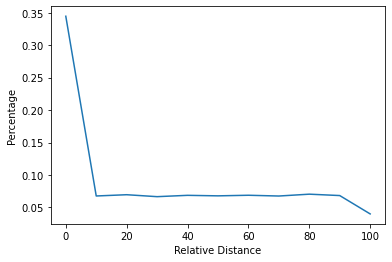

In [7]:
import matplotlib.pyplot as plt
relative_counts = rational_distributions["rel_pos_count"]
total = sum(relative_counts.values())
X = [int(k) for k in relative_counts.keys()] 
Y = [r/total for r in relative_counts.values()]

pairs = sorted([(x,y) for x,y in zip(X, Y)], key=lambda p: p[0])
plt.xlabel
X_sorted = [p[0] for p in pairs]
Y_sorted = [p[1] for p in pairs]
plt.xlabel("Relative Distance")
plt.ylabel("Percentage")
plt.plot(X_sorted, Y_sorted, "")


<BarContainer object of 11 artists>

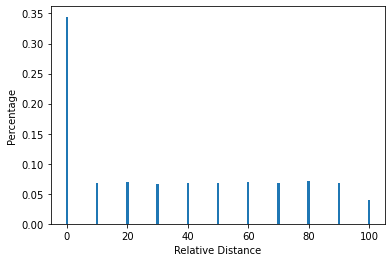

In [8]:
plt.xlabel("Relative Distance")
plt.ylabel("Percentage")
plt.bar(X, Y)

<BarContainer object of 196 artists>

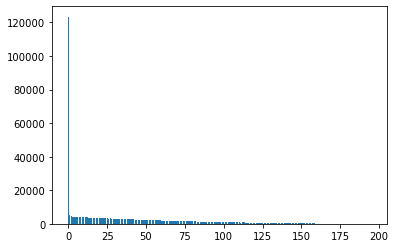

In [11]:
abs_pos_count = rational_distributions["abs_pos_count"]
plt.bar(abs_pos_count.keys(),abs_pos_count.values())

## Analysing some examples

In [12]:
examples = ["How are you doing?", "What did you do today?", "How's work?", "Would you like some coffee?"]

In [13]:
## First with greedy rationals
completed_dialogues_chance = lm_RE.complete_dialogues(examples, total_length=40, greedy_rationals=False)
completed_dialogues_greedy = lm_RE.complete_dialogues(examples, total_length=40, greedy_rationals=True)

In [14]:
from utils.analysis import pretty_print_completed_dialogues

In [15]:
pretty_print_completed_dialogues(completed_dialogues_greedy)

context ----> response
[MASK] [MASK] [MASK] [MASK] [MASK] ------> i ' m looking for an account ##ant in my account . i have to be there in my office [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> no , thank you , mr . smith . i want to check out a single room , mr - [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> not really ! and i can ’ t seem that so well . i am sure we can do you [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> i ' d love to . what kind of room would you like to drink ? [SEP]
[MASK] [MASK] [MASK] work [MASK] ------> yes , i do . but i ' d like to buy some money . you can ’ t have [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK]

In [16]:
pretty_print_completed_dialogues(completed_dialogues_chance)

context ----> response
[MASK] [MASK] you [MASK] [MASK] ------> what do you mean ? [SEP]
how [MASK] [MASK] [MASK] ? [MASK] [MASK] [MASK] [MASK] [MASK] [SEP] ------> i am not sure . [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] mean [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] . [MASK] ------> what is the job ? [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] mean [MASK] [MASK] i [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> i would like to make dinner with me . i ’ m sorry . i don ’ t know what [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> hi , tom . i ’ m sorry i have so bad for your help . [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] tom [MASK] [MASK] [MASK] m sorry [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] . [MASK] ------> oh , no problem . we ' ll have to wait ! [SEP]
[MASK] [MASK] [MASK] [MASK] today [MASK] hi , [MASK] . [MASK] [MASK] m [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK]